In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("coin_XRP.csv")

In [3]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.0,4.387916e+07
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.0,3.659101e+07
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.0,3.453412e+07
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.0,3.325863e+07
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.0,3.354750e+07


In [4]:
cols = [3,7]
df = df[df.columns[cols]]
df.columns = ['Date','Close']
df.rename(columns={"Date": "ds", "Close": "y"},inplace=True)
df.head()

,ds,y
0,2013-08-05 23:59:59,0.005613
1,2013-08-06 23:59:59,0.004680
2,2013-08-07 23:59:59,0.004417
3,2013-08-08 23:59:59,0.004254
4,2013-08-09 23:59:59,0.004291


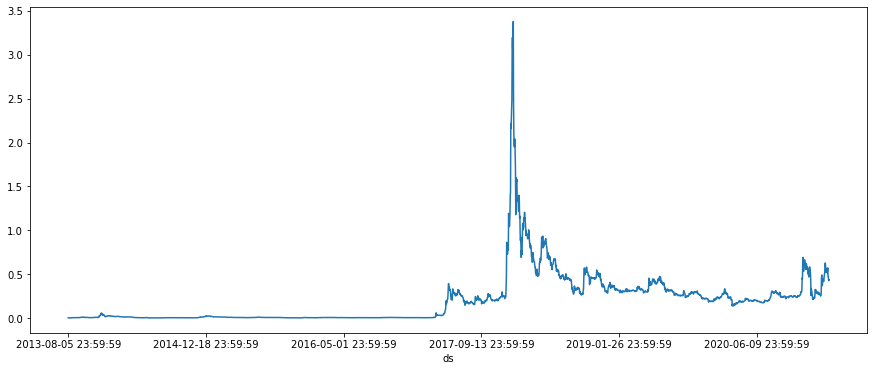

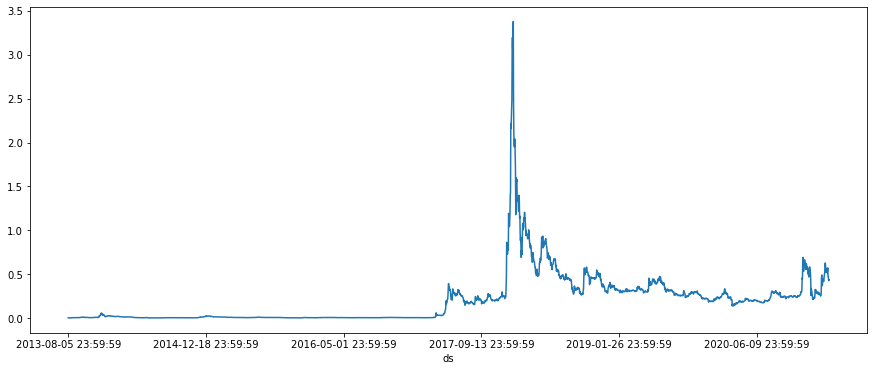

In [5]:
pd.plotting.register_matplotlib_converters()
plt.figure(figsize=(15,6))
df.set_index('ds').y.plot().figure

In [6]:
from fbprophet import Prophet

In [7]:
m = Prophet(daily_seasonality=True,seasonality_mode='multiplicative')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [17]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3124,2022-02-23 23:59:59
3125,2022-02-24 23:59:59
3126,2022-02-25 23:59:59
3127,2022-02-26 23:59:59
3128,2022-02-27 23:59:59


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-08-05 23:59:59,0.008127,-0.112857,0.134779
1,2013-08-06 23:59:59,0.008018,-0.119199,0.137931
2,2013-08-07 23:59:59,0.008187,-0.126041,0.135741
3,2013-08-08 23:59:59,0.008430,-0.127690,0.141250
4,2013-08-09 23:59:59,0.008623,-0.124518,0.137270


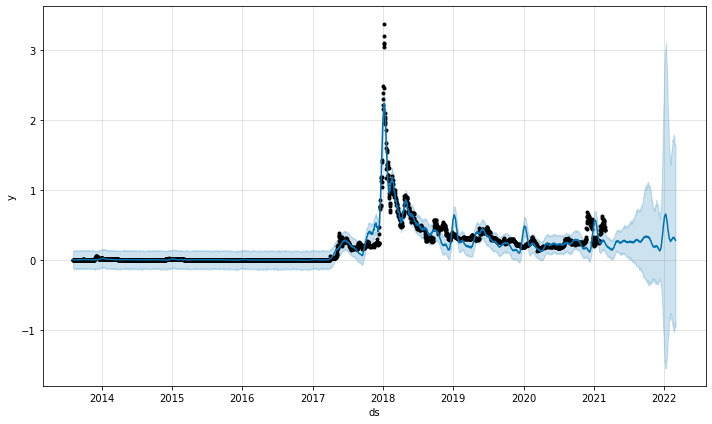

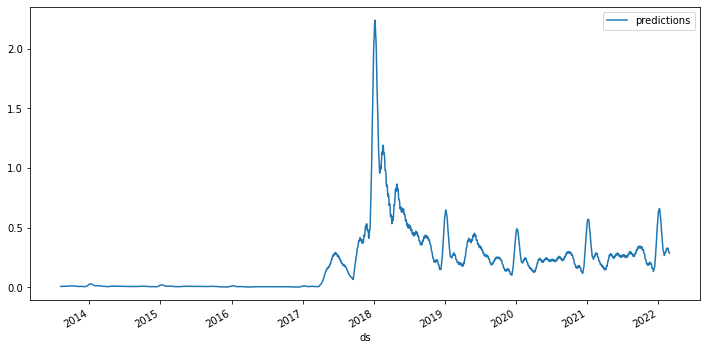

In [19]:
fig1 = m.plot(forecast)
forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,6))

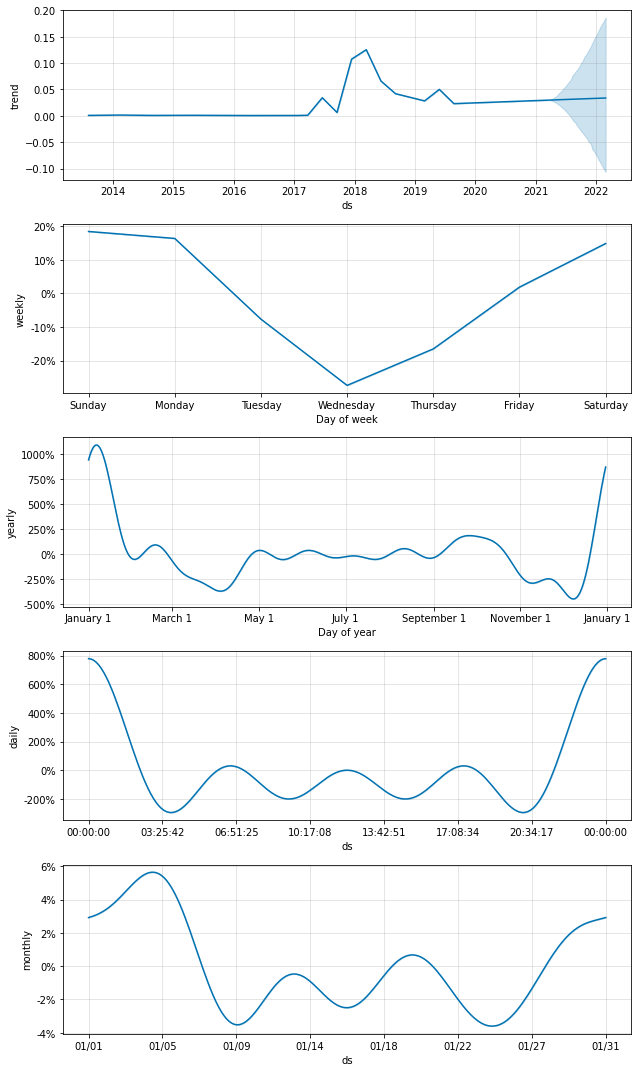

In [20]:
fig2 = m.plot_components(forecast)

In [22]:
from sklearn.metrics import mean_squared_error
index = df.index
rmse = np.sqrt(mean_squared_error(df['y'], forecast[:len(index)]['yhat']))
print("RMSE: %f" % (rmse))


RMSE: 0.101356


In [23]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-09-22 23:59:59 and 2020-02-28 23:59:59


In [14]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-09-23 23:59:59,0.007724,0.004759,0.010702,0.006668,2015-09-22 23:59:59
1,2015-09-24 23:59:59,0.007689,0.004817,0.010823,0.006710,2015-09-22 23:59:59
2,2015-09-25 23:59:59,0.007418,0.004067,0.010799,0.006650,2015-09-22 23:59:59
3,2015-09-26 23:59:59,0.007155,0.003813,0.010300,0.006501,2015-09-22 23:59:59
4,2015-09-27 23:59:59,0.007041,0.003844,0.010259,0.006536,2015-09-22 23:59:59


In [24]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,0.031653,0.177914,0.104368,0.394123,0.326786,0.460274
1,38 days,0.032711,0.180863,0.106165,0.401659,0.352038,0.457534
2,39 days,0.033971,0.184311,0.108211,0.409936,0.364050,0.449315
3,40 days,0.035409,0.188172,0.110765,0.419431,0.373337,0.435616
4,41 days,0.036999,0.192352,0.113410,0.428740,0.384263,0.426027


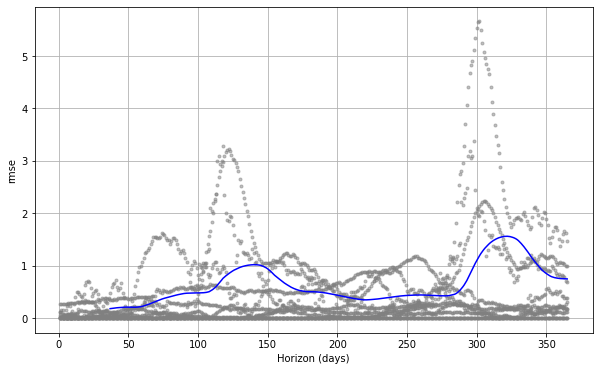

In [25]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse') 